## Practice of Multiple Correspondance Analysis with `fanalysis`

In [10]:
# launch all the basic modules
import os
import pandas
import pandas as pd
import numpy
import numpy as np

In [11]:
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track'

In [12]:
# change working directory
os.chdir('/Users/clement.guiraud/Desktop/Data analysis/Data analysis track')
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track'

Alternatively you may do the following : <br>
`dir_path = r'F:\Dropbox\EM Lyon\5A2F14_Advanced_Statistics\Multiple_Correspondance_Analysis\data'`  (to provide the path to the dataset) <br>
Then : <br> 
`os.chdir(dir_path`

In [13]:
# load data - index_col = 0 means n°0 is the label
D = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CANINES",index_col=0)

# print summary
print(D.info())

# select and print active variables
DActives = D[['Taille','Velocite','Affection']]
print(DActives)

# define p = number of variables
p = DActives.shape[1]

# define n = number of observations
n = DActives.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Beauceron to Labrador
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Taille     8 non-null      object 
 1   Velocite   8 non-null      object 
 2   Affection  8 non-null      object 
 3   Cote       8 non-null      float64
 4   Fonction   8 non-null      object 
dtypes: float64(1), object(4)
memory usage: 384.0+ bytes
None
               Taille Velocite Affection
Chien                                   
Beauceron    Taille++  Veloc++    Affec+
Basset         Taill-    Velo-     Affe-
Berger All   Taille++  Veloc++    Affec+
Boxer         Taille+   Veloc+    Affec+
Bull-Dog       Taill-    Velo-    Affec+
Bull-Mastif  Taille++    Velo-     Affe-
Caniche        Taill-   Veloc+    Affec+
Labrador      Taille+   Veloc+    Affec+


In [14]:
D

,Taille,Velocite,Affection,Cote,Fonction
Chien,,,,,
Beauceron,Taille++,Veloc++,Affec+,2.0,utilite
Basset,Taill-,Velo-,Affe-,4.5,chasse
Berger All,Taille++,Veloc++,Affec+,2.5,utilite
Boxer,Taille+,Veloc+,Affec+,3.0,compagnie
Bull-Dog,Taill-,Velo-,Affec+,1.5,compagnie
Bull-Mastif,Taille++,Velo-,Affe-,1.0,utilite
Caniche,Taill-,Veloc+,Affec+,4.0,compagnie
Labrador,Taille+,Veloc+,Affec+,3.5,chasse


In [15]:
# dummy coding (one hot encoding)
X = pandas.get_dummies(DActives,prefix='',prefix_sep='')
print(X)

# define M = total number of modalities
M = X.shape[1]

M

             Taill-  Taille+  Taille++  Velo-  Veloc+  Veloc++  Affe-  Affec+
Chien                                                                        
Beauceron         0        0         1      0       0        1      0       1
Basset            1        0         0      1       0        0      1       0
Berger All        0        0         1      0       0        1      0       1
Boxer             0        1         0      0       1        0      0       1
Bull-Dog          1        0         0      1       0        0      0       1
Bull-Mastif       0        0         1      1       0        0      1       0
Caniche           1        0         0      0       1        0      0       1
Labrador          0        1         0      0       1        0      0       1


8

In [16]:
# import MCA module of fanalysis package
from fanalysis.mca import MCA

# instantiate a MCA object and fit it on the data
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

MCA(row_labels=Index(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog', 'Bull-Mastif',
       'Caniche', 'Labrador'],
      dtype='object', name='Chien'),
    var_labels=Index(['Taille', 'Velocite', 'Affection'], dtype='object'))

In [17]:
# print methods and attributes
dir(acm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binarization',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'c_',
 'col_contrib_',
 'col_coord_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_labels_short_temp_',
 'col_labels_temp_',
 'col_topandas',
 'eig_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'model_',
 'n_',
 'n_categories_',
 'n_components',
 'n_components_',
 'n_vars_',
 'plot_col_contrib'

In [18]:
# compute the maximum number of factors
Hmax = M-p

# display eigenvalues
display(pandas.DataFrame(numpy.transpose(acm.eig_),columns=['Eigenvalues','%','Cumul %'],index=range(1,Hmax+1)))

,Eigenvalues,%,Cumul %
1,0.708031,42.481875,42.481875
2,0.591489,35.489362,77.971237
3,0.261992,15.719509,93.690746
4,0.069747,4.184791,97.875538
5,0.035408,2.124462,100.000000


In [19]:
# Burt inertia : sum squared of the eigenvalues
print(f"Burt inertia : {numpy.sum(acm.eig_[0]**2)}")

Burt inertia : 0.9259259259259274


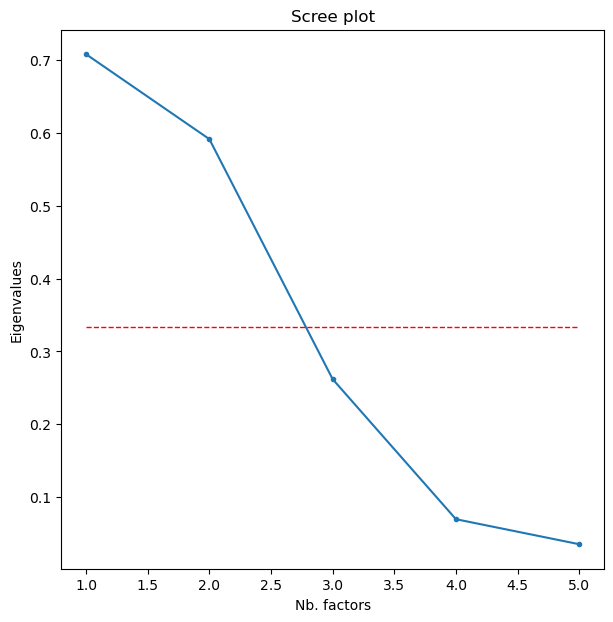

In [20]:
# plotting eigenvalues
import matplotlib.pyplot as plt

# scree plot
fix,ax = plt.subplots(figsize=(7,7))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree plot")

#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

In [21]:
# keep the eigenvalues greater than (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

[0.70803126 0.59148936]


In [22]:
# apply Benzécri correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[0.3158967  0.14995021]


In [23]:
# compute Benzécri corrected total cumulated variance
S_prim = numpy.sum(lambada_prim)
print(f"Benzécri corrected total variance : {S_prim}")

# percentage of explained variance
percent_prim = lambada_prim/S_prim*100

# print
pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_prim,numpy.cumsum(percent_prim)])),
                 columns=['EigenValues','%','Cumul %'],index=range(1,3))

Benzécri corrected total variance : 0.4658469098168333


,EigenValues,%,Cumul %
1,0.315897,67.811269,67.811269
2,0.149950,32.188731,100.000000


In [24]:
# compute Greenacre corrected cumulated variance
S2nd = p/(p-1)*(numpy.sum(acm.eig_[0]**2)-(M-p)/(p**2))
print(f"Greenacre corrected total variance : {S2nd}")

Greenacre corrected total variance : 0.5555555555555577


In [25]:
# Greenacre corrected percentage of explained variance
percent_2nd = lambada_prim/S2nd

# print
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_2nd,numpy.cumsum(percent_2nd)])),
                       columns=['Eigenvalues','%','Cumul %'],index=range(1,3)))

   Eigenvalues         %   Cumul %
1     0.315897  0.568614  0.568614
2     0.149950  0.269910  0.838524


## Correct values we should use !!

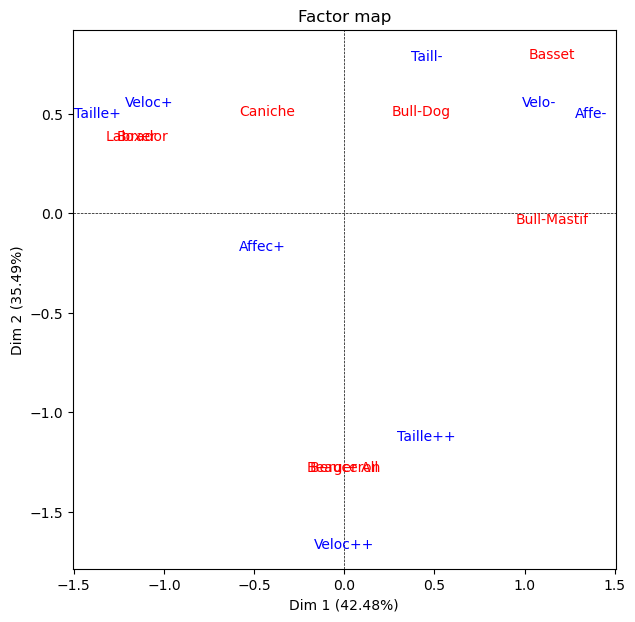

In [26]:
# plot in first factorial plane
acm.mapping(num_x_axis=1,num_y_axis=2, figsize=(7,7))

# Variables study

In [27]:
# print row coordinates in the first factor plane
print(pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['Coord.F1','Coord.F2']))

                 Coord.F1  Coord.F2
Chien                              
Beauceron    4.924471e-15 -1.279924
Basset       1.150779e+00  0.799057
Berger All   4.763557e-15 -1.279924
Boxer       -1.150779e+00  0.385124
Bull-Dog     4.284137e-01  0.509675
Bull-Mastif  1.150779e+00 -0.028809
Caniche     -4.284137e-01  0.509675
Labrador    -1.150779e+00  0.385124


In [28]:
# print modalities coordinates in the first factor plane
print(pandas.DataFrame(acm.col_coord_[:,:2],index=X.columns,columns=['Coord.F1','Coord.F2']))

              Coord.F1  Coord.F2
Taill-    4.558738e-01  0.788128
Taille+  -1.367621e+00  0.500758
Taille++  4.558738e-01 -1.121966
Velo-     1.081461e+00  0.554740
Veloc+   -1.081461e+00  0.554740
Veloc++   7.058942e-15 -1.664220
Affe-     1.367621e+00  0.500758
Affec+   -4.558738e-01 -0.166919


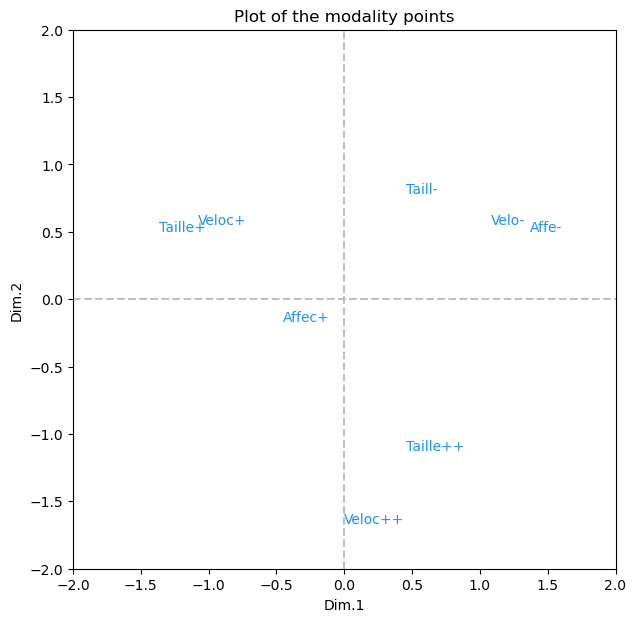

In [29]:
# plot the observations in the first factorial plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Plot of the modality points")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
          
plt.show()

In [30]:
# display contributions
print(pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns,columns=['Contrib.F1','Contrib.F2']))

            Contrib.F1  Contrib.F2
Taill-    3.668993e+00   13.126725
Taille+   2.201396e+01    3.532865
Taille++  3.668993e+00   26.602515
Velo-     2.064806e+01    6.503426
Veloc+    2.064806e+01    6.503426
Veloc++   5.864697e-28   39.020556
Affe-     2.201396e+01    3.532865
Affec+    7.337985e+00    1.177622


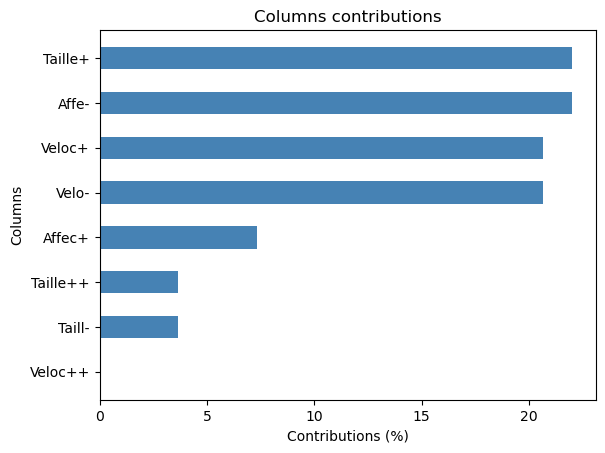

In [31]:
# or plot them
acm.plot_col_contrib(num_axis=1)

In [32]:
# display cos²
print(pandas.DataFrame(acm.col_cos2_[:,:2],index=X.columns,columns=['Cos2.F1','Cos2.F2']))

               Cos2.F1   Cos2.F2
Taill-    1.246926e-01  0.372687
Taille+   6.234628e-01  0.083586
Taille++  1.246926e-01  0.755285
Velo-     7.017346e-01  0.184642
Veloc+    7.017346e-01  0.184642
Veloc++   1.660956e-29  0.923210
Affe-     6.234628e-01  0.083586
Affec+    6.234628e-01  0.083586


In [33]:
# print cumulated cos²
print(pandas.DataFrame(numpy.cumsum(acm.col_cos2_[:,:2],axis=1),index=X.columns,columns=['Cos2.F1','Cum(Cos2).F2']))

               Cos2.F1  Cum(Cos2).F2
Taill-    1.246926e-01      0.497380
Taille+   6.234628e-01      0.707049
Taille++  1.246926e-01      0.879978
Velo-     7.017346e-01      0.886377
Veloc+    7.017346e-01      0.886377
Veloc++   1.660956e-29      0.923210
Affe-     6.234628e-01      0.707049
Affec+    6.234628e-01      0.707049


In [34]:
dir(acm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binarization',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'c_',
 'col_contrib_',
 'col_coord_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_labels_short_temp_',
 'col_labels_temp_',
 'col_topandas',
 'eig_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'model_',
 'n_',
 'n_categories_',
 'n_components',
 'n_components_',
 'n_vars_',
 'plot_col_contrib'

In [35]:
# counts (frequency) per modality (n_k)
print(acm.c_)

[[3. 2. 3. 3. 3. 2. 2. 6.]]


In [36]:
# compute test values per modality - Factor 1
vtest = acm.col_coord_[:,0]*numpy.sqrt(((n-1)*acm.c_[0])/(n-acm.c_[0]))
print(pandas.DataFrame(vtest,index=X.columns, columns=['Test Values F1']))

          Test Values F1
Taill-      9.342633e-01
Taille+    -2.089076e+00
Taille++    9.342633e-01
Velo-       2.216335e+00
Veloc+     -2.216335e+00
Veloc++     1.078271e-14
Affe-       2.089076e+00
Affec+     -2.089076e+00


## Looking for value < 0.05

In [37]:
# save contributions under 2 facteurs (do not rename columns !!!)
contrib12 = pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns)
print(contrib12)

                     0          1
Taill-    3.668993e+00  13.126725
Taille+   2.201396e+01   3.532865
Taille++  3.668993e+00  26.602515
Velo-     2.064806e+01   6.503426
Veloc+    2.064806e+01   6.503426
Veloc++   5.864697e-28  39.020556
Affe-     2.201396e+01   3.532865
Affec+    7.337985e+00   1.177622


In [38]:
# compute squared correlation per variable on the two factors #

# initialize eta² matrix
eta2 = numpy.zeros((3,2))

# for each factor
for h in range(2):
    # for each variable
    for j in range(3):
        eta2[j,h] = (p*acm.eig_[0][h]*numpy.sum(contrib12.loc[numpy.unique(D.iloc[:,j])][h]))/100

#affichage
print(pandas.DataFrame(eta2,index=D.columns[:3],columns=['eta² F1','eta² F2']))

            eta² F1   eta² F2
Taille     0.623463  0.767672
Velocite   0.877168  0.923210
Affection  0.623463  0.083586


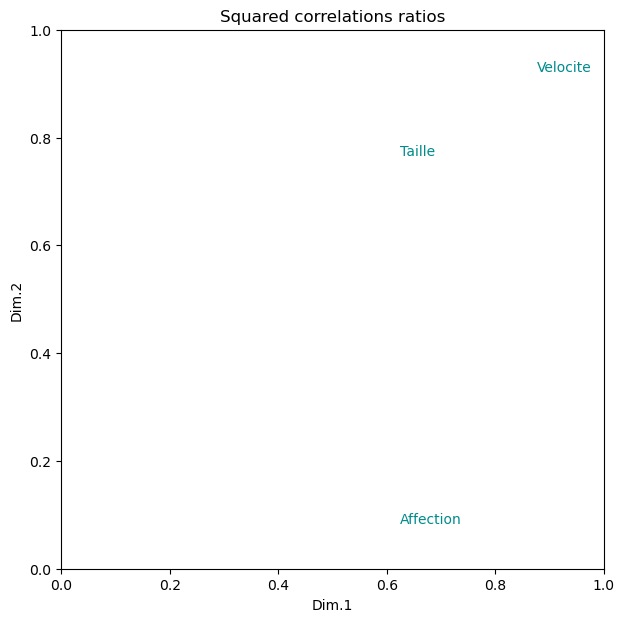

In [39]:
# plotting the variables in the first plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([0,+1,0,+1])
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Squared correlations ratios")

for i in range(3):
    ax.text(eta2[i,0],eta2[i,1],D.columns[i],color='darkcyan')
          
plt.show()


In [40]:
# coordinates of the individuals in the first plane
print(pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['Coord.F1','Coord.F2']))

                 Coord.F1  Coord.F2
Chien                              
Beauceron    4.924471e-15 -1.279924
Basset       1.150779e+00  0.799057
Berger All   4.763557e-15 -1.279924
Boxer       -1.150779e+00  0.385124
Bull-Dog     4.284137e-01  0.509675
Bull-Mastif  1.150779e+00 -0.028809
Caniche     -4.284137e-01  0.509675
Labrador    -1.150779e+00  0.385124


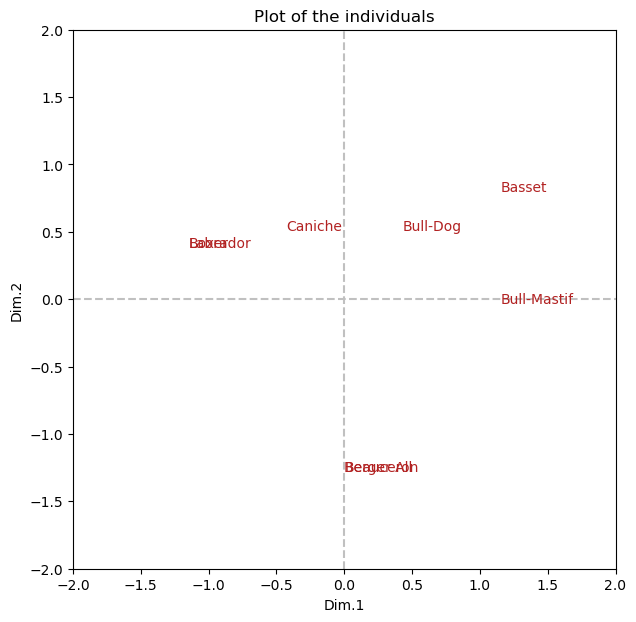

In [41]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Plot of the individuals")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
          
plt.show()

In [42]:
# display the contributions
print(pandas.DataFrame(acm.row_contrib_[:,:2],index=X.index,columns=['Contrib.F1','Contrib.F2']))

               Contrib.F1  Contrib.F2
Chien                                
Beauceron    4.281311e-28   34.620365
Basset       2.337985e+01   13.493329
Berger All   4.006086e-28   34.620365
Boxer        2.337985e+01    3.134479
Bull-Dog     3.240293e+00    5.489722
Bull-Mastif  2.337985e+01    0.017539
Caniche      3.240293e+00    5.489722
Labrador     2.337985e+01    3.134479


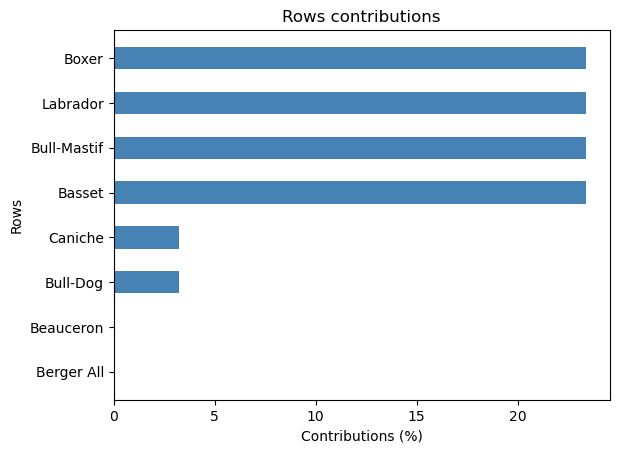

In [43]:
# or even plot them
acm.plot_row_contrib(num_axis=1)

In [44]:
# print the cos²
print(pandas.DataFrame(acm.row_cos2_[:,:2],index=X.index,columns=['Cos2.F1','Cos2.F2']))

                  Cos2.F1   Cos2.F2
Chien                              
Beauceron    1.455025e-29  0.982924
Basset       6.272969e-01  0.302444
Berger All   1.361488e-29  0.982924
Boxer        7.945760e-01  0.088993
Bull-Dog     1.501677e-01  0.212538
Bull-Mastif  6.272969e-01  0.000393
Caniche      1.501677e-01  0.212538
Labrador     7.945760e-01  0.088993


In [45]:
# print the cumulated cos²
print(pandas.DataFrame(numpy.cumsum(acm.row_cos2_[:,:2],axis=1),index=X.index,columns=['Cos2.F1','Cum(Cos2).F2']))

                  Cos2.F1  Cum(Cos2).F2
Chien                                  
Beauceron    1.455025e-29      0.982924
Basset       6.272969e-01      0.929741
Berger All   1.361488e-29      0.982924
Boxer        7.945760e-01      0.883569
Bull-Dog     1.501677e-01      0.362706
Bull-Mastif  6.272969e-01      0.627690
Caniche      1.501677e-01      0.362706
Labrador     7.945760e-01      0.883569


In [46]:
# profile of the Basset
profil_Basset = X.loc["Basset"]/p
print(profil_Basset)

Taill-      0.333333
Taille+     0.000000
Taille++    0.000000
Velo-       0.333333
Veloc+      0.000000
Veloc++     0.000000
Affe-       0.333333
Affec+      0.000000
Name: Basset, dtype: float64


In [47]:
# reminder : factor coordinates on the first factor
print(acm.col_coord_[:,0])

[ 4.55873798e-01 -1.36762139e+00  4.55873798e-01  1.08146090e+00
 -1.08146090e+00  7.05894227e-15  1.36762139e+00 -4.55873798e-01]


In [48]:
# coordinates of the Basset on the first axis (dot product)
coord_Basset = (1/numpy.sqrt(acm.eig_[0][0]))*numpy.dot(profil_Basset,acm.col_coord_[:,0])
print(coord_Basset)

1.150779460602135


In [49]:
# check
print(pandas.DataFrame(acm.row_coord_[:,0],index=X.index).loc['Basset'])

0    1.150779
Name: Basset, dtype: float64


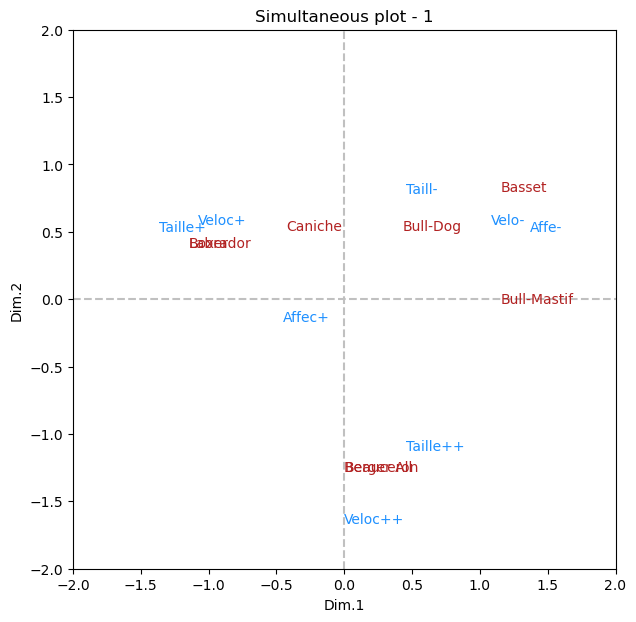

In [50]:
# simultaneous representation - relation quasi-barycentrique
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Simultaneous plot - 1")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
    
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
          
plt.show()

In [51]:
# données temporaires liant Taille et Facteur (1,2)
temp = pandas.DataFrame(acm.row_coord_[:,:2],columns=['F1','F2'],index=X.index)
temp['Taille'] = D['Taille']
print(temp)

                       F1        F2    Taille
Chien                                        
Beauceron    4.924471e-15 -1.279924  Taille++
Basset       1.150779e+00  0.799057    Taill-
Berger All   4.763557e-15 -1.279924  Taille++
Boxer       -1.150779e+00  0.385124   Taille+
Bull-Dog     4.284137e-01  0.509675    Taill-
Bull-Mastif  1.150779e+00 -0.028809  Taille++
Caniche     -4.284137e-01  0.509675    Taill-
Labrador    -1.150779e+00  0.385124   Taille+


In [52]:
# conditional means
print(pandas.pivot_table(temp,values=['F1','F2'],index='Taille',aggfunc='mean'))

                F1        F2
Taille                      
Taill-    0.383593  0.606136
Taille+  -1.150779  0.385124
Taille++  0.383593 -0.862886


The modalities are defined in such a way that their coordinates correspond to the average of the coordinates of the individuals they are associated with.

In [53]:
# coordinates of the modalities - centroid relationships
coord_moda_2 = numpy.array([acm.col_coord_[:,0]*numpy.sqrt(acm.eig_[0][0]),acm.col_coord_[:,1]*numpy.sqrt(acm.eig_[0][1])])
print(pandas.DataFrame(numpy.transpose(coord_moda_2),index=X.columns,columns=['G_prim_1','G_prim_2']))

              G_prim_1  G_prim_2
Taill-    3.835932e-01  0.606136
Taille+  -1.150779e+00  0.385124
Taille++  3.835932e-01 -0.862886
Velo-     9.099909e-01  0.426641
Veloc+   -9.099909e-01  0.426641
Veloc++   5.939718e-15 -1.279924
Affe-     1.150779e+00  0.385124
Affec+   -3.835932e-01 -0.128375


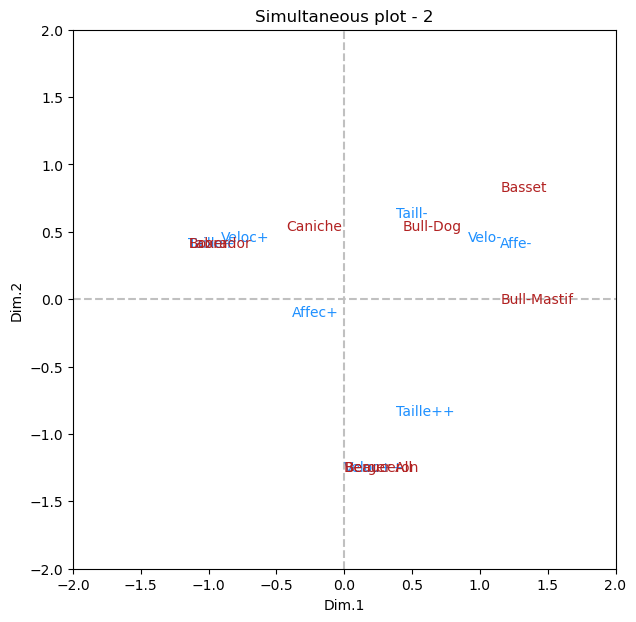

In [54]:
# simultaneous plot - centroid relationships
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Simultaneous plot - 2")

for i in range(X.shape[1]):
    ax.text(coord_moda_2[0,i],coord_moda_2[1,i],X.columns[i],color='dodgerblue')
    
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
          
plt.show()

In [55]:
# load supplementary individual
DSupp = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CANINES_SUPP",index_col=0)
print(DSupp)

           Taille Velocite Affection
Chien                               
Levrier  Taille++  Veloc++     Affe-


In [56]:
# remind modality coordinates
print(pandas.DataFrame(acm.col_coord_[:,:2],index=X.columns))

                     0         1
Taill-    4.558738e-01  0.788128
Taille+  -1.367621e+00  0.500758
Taille++  4.558738e-01 -1.121966
Velo-     1.081461e+00  0.554740
Veloc+   -1.081461e+00  0.554740
Veloc++   7.058942e-15 -1.664220
Affe-     1.367621e+00  0.500758
Affec+   -4.558738e-01 -0.166919


In [57]:
# remind eigenvalues
print(acm.eig_[0][:2])

[0.70803126 0.59148936]


In [58]:
# preprocess supplementary individual

# initialize vector
XSupp = numpy.zeros(M)

# dummy coding
for v in DSupp.loc['Levrier'].values:
    XSupp[numpy.where(X.columns==v)] = 1

# compute profile
XSupp = XSupp / p
print(XSupp)

[0.         0.         0.33333333 0.         0.         0.33333333
 0.33333333 0.        ]


In [59]:
# projection on the factor coordinates
coord_supp = numpy.dot(numpy.reshape(XSupp,(1,M)),acm.col_coord_[:,:2])
coord_supp = coord_supp / numpy.sqrt(acm.eig_[0][:2])
print(coord_supp)

[[ 0.72236576 -0.99054221]]


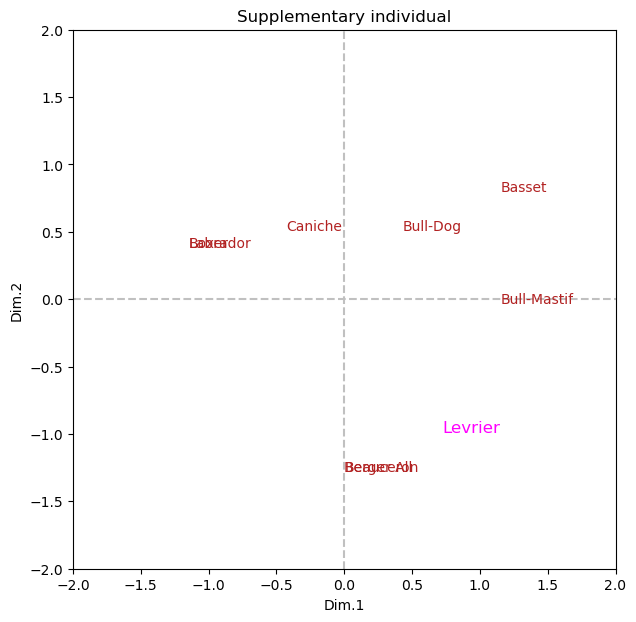

In [60]:
# represent in first factor plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Supplementary individual")

# active individuals
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')

# supplementary individual
ax.text(coord_supp[0][0],coord_supp[0][1],'Levrier',color='magenta',fontsize=12)
          
plt.show()

In [61]:
# supplementary variables
print(D[['Cote','Fonction']])

             Cote   Fonction
Chien                       
Beauceron     2.0    utilite
Basset        4.5     chasse
Berger All    2.5    utilite
Boxer         3.0  compagnie
Bull-Dog      1.5  compagnie
Bull-Mastif   1.0    utilite
Caniche       4.0  compagnie
Labrador      3.5     chasse


In [64]:
help(numpy.corrcoef)

Help on function corrcoef in module numpy:

corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>, *, dtype=None)
    Return Pearson product-moment correlation coefficients.
    
    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is
    
    .. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }
    
    The values of `R` are between -1 and 1, inclusive.
    
    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observations. `y` has the same
        shape as `x`.
    rowvar : bool, optional
        If `rowvar` is True (default), then each row represents a
        vari

In [63]:
# Correlation of Cote with the 2 first factors
corr_cote = numpy.corrcoef(D.Cote,acm.row_coord_[:,:2],rowvar=False)[0,1:]
print(corr_cote)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# display in the coorelation circle
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1,+1,-1,+1])
ax.plot([-1,+1],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1,+1],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Correlations circle")

#variables illustratives
ax.text(corr_cote[0],corr_cote[1],'Cote',color='brown')
ax.arrow(0,0,corr_cote[0]+0.1,corr_cote[1]-0.1,color='r',head_width=0.05)

#cercle
from matplotlib.patches import Ellipse
ellipse = Ellipse((0,0),width=2,height=2,facecolor='none',edgecolor='silver',linestyle='--')
ax.add_patch(ellipse)
    
plt.show()

In [ ]:
# temporary structure including factors 1 and 2, and variable fonction
df = pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['F1','F2'])
df['Fonction'] = D.Fonction
print(df)

In [59]:
# compute conditional means
GBar = pandas.pivot_table(df,values=['F1','F2'],index="Fonction",aggfunc='mean')
print(GBar)

                     F1        F2
Fonction                         
chasse    -2.109424e-15  0.592091
compagnie -3.835932e-01  0.468158
utilite    3.835932e-01 -0.862886


In [60]:
# factor coordinates of the modalities - Solution 1
Gv1 = GBar.values/numpy.sqrt(acm.eig_[0][:2])
Gv1 = pandas.DataFrame(Gv1,index=GBar.index,columns=GBar.columns)
print(Gv1)

                     F1        F2
Fonction                         
chasse    -2.506903e-15  0.769866
compagnie -4.558738e-01  0.608722
utilite    4.558738e-01 -1.121966


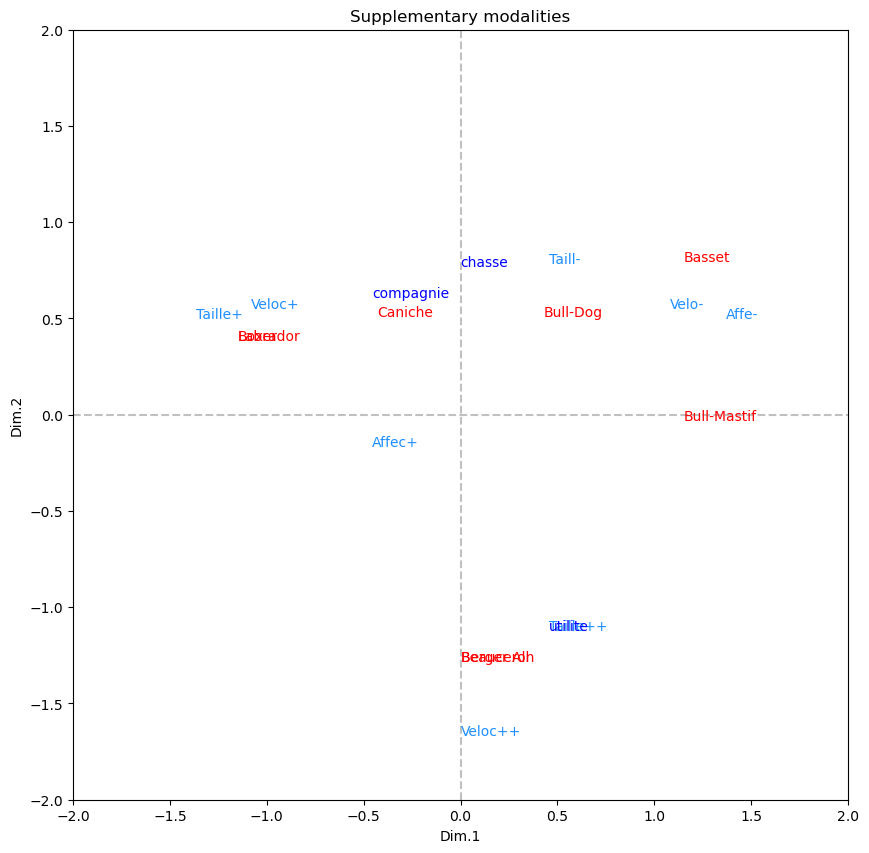

In [61]:
# plot of supplementary variables in the first factor plane
fix,ax = plt.subplots(figsize=(10,10))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Supplementary modalities")

# active modalities
for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
    
# active modalities
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='red')
    
# modalities of the supplementary variable "fonction"
for i in Gv1.index:
    ax.text(Gv1.loc[i][0],Gv1.loc[i][1],i,color='blue')
          
plt.show()